# K-Nearest Neighbour

### Mathematical Formulation

At its heart, the KNN algorithm operates on the principle that data points with similar features tend to belong to the same class (in classification) or have similar target values (in regression). Given a new, unlabelled data point, the algorithm identifies the 'k' closest data points in the training set based on a chosen distance metric. The prediction for the new point is then determined by the majority class (for classification) or the average (or weighted average) of the target values (for regression) of these 'k' nearest neighbours.

Let the training dataset be denoted as $D = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ..., (\mathbf{x}_n, y_n)\}$, where $\mathbf{x}_i \in \mathbb{R}^d$ represents the $d$-dimensional feature vector of the $i$-th data point, and $y_i$ is the corresponding label (for classification) or target value (for regression). Consider a new, unlabelled data point $\mathbf{x}_{new}$ for which we want to make a prediction.

#### Distance Metrics

The first crucial step in the KNN algorithm is to define a measure of distance between data points. Several distance metrics can be employed, with the most common being the Minkowski distance. The Minkowski distance between two points $\mathbf{p} = (p_1, p_2, ..., p_d)$ and $\mathbf{q} = (q_1, q_2, ..., q_d)$ in $d$-dimensional space is defined as:

$$D(\mathbf{p}, \mathbf{q}) = \left( \sum_{i=1}^{d} |p_i - q_i|^r \right)^{1/r}$$

By varying the value of $r$, we obtain different distance metrics:

- Euclidean Distance ($r=2$)
    $$
    D_E(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{d} (p_i - q_i)^2}
    $$
- Manhattan Distance ($r=1$)
    $$
    D_M(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^{d} |p_i - q_i|
    $$
- Chebyshev Distance ($r=\infty$)
    $$
    D_C(\mathbf{p}, \mathbf{q}) = \max_{i} |p_i - q_i|
    $$
The choice of distance metric can significantly impact the performance of the KNN algorithm and should be considered based on the characteristics of the data.

#### Finding the K-Nearest Neighbours

Once a distance metric is chosen, the algorithm calculates the distance between the new data point $\mathbf{x}_{new}$ and all data points in the training set $D$. It then identifies the $k$ training data points that have the smallest distances to $\mathbf{x}_{new}$. Let these $k$ nearest neighbours be denoted by the set $N_k(\mathbf{x}_{new}) = \{(\mathbf{x}_{(1)}, y_{(1)}), (\mathbf{x}_{(2)}, y_{(2)}), ..., (\mathbf{x}_{(k)}, y_{(k)})\}$, where the subscript $(i)$ indicates the $i$-th nearest neighbour.

### Prediction

#### Classification

In a classification task, the goal is to assign a class label to the new data point $\mathbf{x}_{new}$. The KNN algorithm achieves this by determining the majority class among the $k$ nearest neighbours. Let $C = \{c_1, c_2, ..., c_m\}$ be the set of possible class labels. The predicted class $\hat{y}$ for $\mathbf{x}_{new}$ is given by:

$$
\hat{y} = \underset{c \in C}{\operatorname{argmax}} \sum_{i=1}^{k} 1_{y_{(i)} = c}
$$

where $1_{y_{(i)} = c}$ is an indicator function that equals 1 if the label of the $i$-th nearest neighbour $y_{(i)}$ is equal to class $c$, and 0 otherwise. In essence, the class that appears most frequently among the $k$ nearest neighbours is assigned to the new data point.

#### Prediction for Regression

In a regression task, the goal is to predict a continuous target value for the new data point $\mathbf{x}_{new}$. The KNN algorithm typically does this by calculating the average of the target values of the $k$ nearest neighbours:

$$
\hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_{(i)}
$$

A variation of this is to use a weighted average, where the weights are inversely proportional to the distance from $\mathbf{x}_{new}$ to each of its $k$ neighbours. This gives more influence to closer neighbours. A common weighting scheme is:

$$
w_i = \frac{1}{D(\mathbf{x}_{new}, \mathbf{x}_{(i)}) + \epsilon}
$$

where $\epsilon$ is a small positive constant to avoid division by zero if a neighbour is exactly at $\mathbf{x}_{new}$. The predicted value $\hat{y}$ then becomes:

$$
\hat{y} = \frac{\sum_{i=1}^{k} w_i y_{(i)}}{\sum_{i=1}^{k} w_i}
$$

The choice of the parameter $k$ is critical to the performance of the KNN algorithm. Small values of $k$, e.g. $k=1$, make the algorithm highly sensitive to noise in the data. A single noisy neighbour can significantly influence the prediction. The decision boundary in classification tends to be more complex and can lead to overfitting, where the model learns the training data too well and performs poorly on unseen data. On the other hand, large values of $k$ make the decision boundary in classification smooth and reduce the impact of noise. However, if $k$ is too large, neighbours from different classes or with significantly different target values might be included in the prediction, potentially leading to underfitting, where the model fails to capture the underlying patterns in the data.

The optimal value of $k$ is often determined through empirical evaluation using techniques like cross-validation. This involves splitting the training data into multiple subsets, training the KNN algorithm with different values of $k$ on some subsets, and evaluating its performance on the remaining subsets. The value of $k$ that yields the best performance on the validation sets is typically chosen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd

In [2]:
breast_cancer = datasets.load_breast_cancer()
class_names = breast_cancer.target_names

print(f"Data shape: {breast_cancer.data.shape}")
print(f"Feature names: {breast_cancer.feature_names}")
print(f"Target names: {breast_cancer.target_names}")

Data shape: (569, 30)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


In [3]:
# Make a pandas dataframe
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

# Add the target variable to the dataframe
breast_cancer_df['target'] = breast_cancer.target

breast_cancer_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


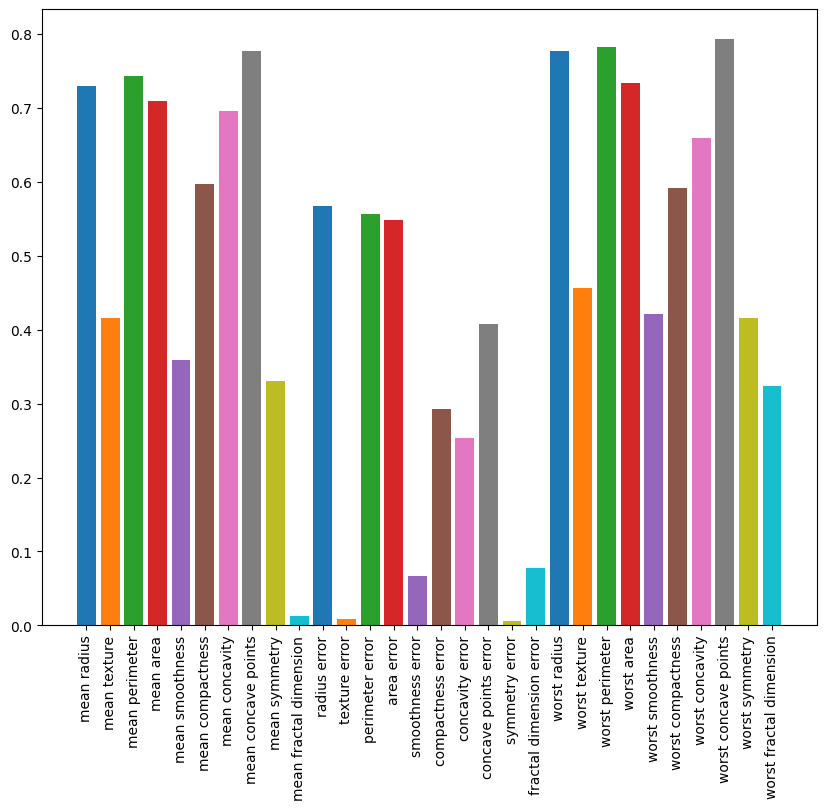

In [4]:
# Find the most relevant features with the target

plt.figure(figsize=(10, 8))
for i, feature in enumerate(breast_cancer.feature_names):
    plt.bar(i, abs(breast_cancer_df[feature].corr(breast_cancer_df['target'])))
plt.xticks(range(len(breast_cancer.feature_names)), breast_cancer.feature_names, rotation=90)
plt.show()


In [5]:
# select the features that has correlation above 0.7 with the target
relevant_features = breast_cancer_df.corrwith(breast_cancer_df['target']).abs().sort_values(ascending=False).drop('target')
relevant_features = relevant_features[relevant_features > 0.7]
relevant_features

worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
dtype: float64

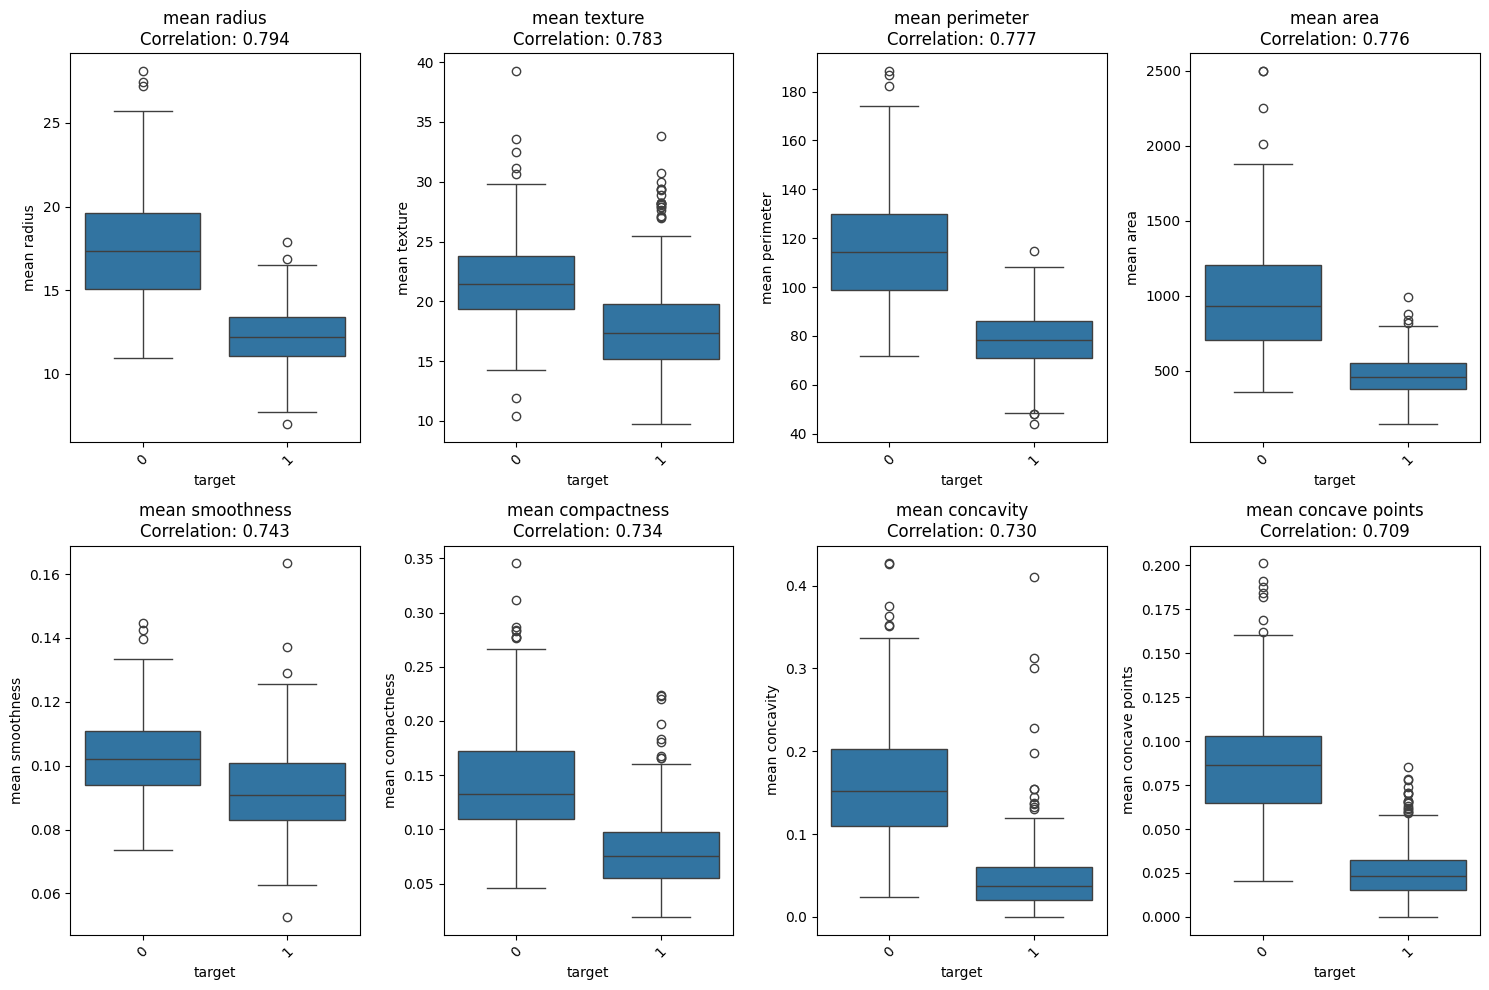

In [6]:
plt.figure(figsize=(15,10))
for i, correlation in enumerate(relevant_features):
    feature = breast_cancer.feature_names[i]
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='target', y=feature, data=breast_cancer_df)
    plt.title(f'{feature}\nCorrelation: {correlation:.3f}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

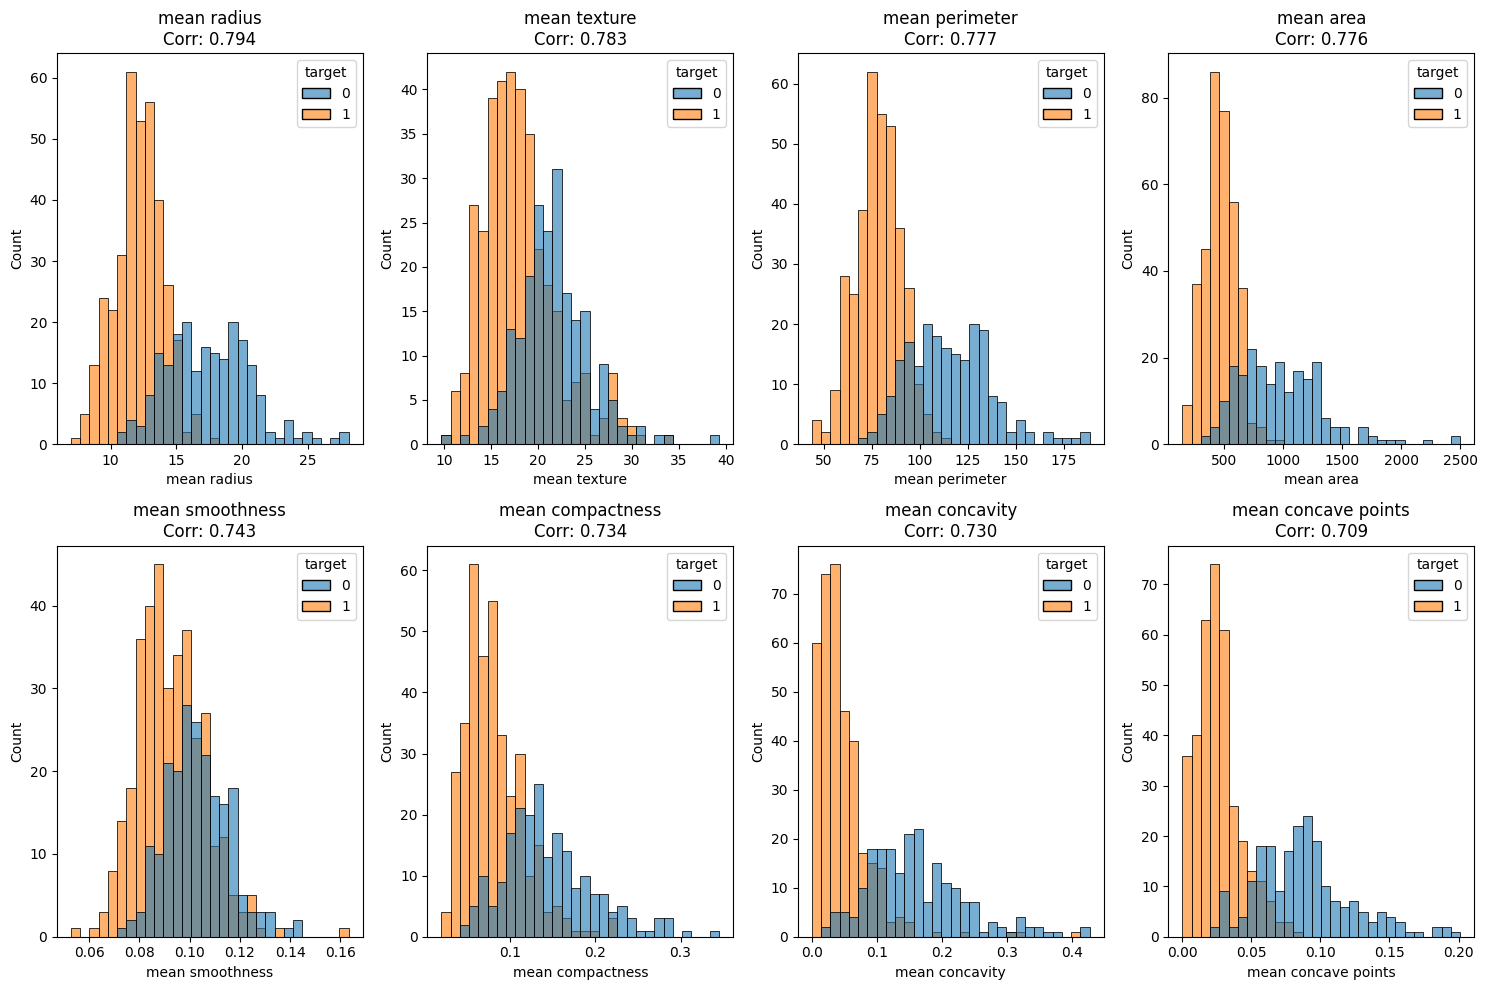

In [7]:
# Distribution plots for top 8 features
plt.figure(figsize=(15, 10))
for i, correlation in enumerate(relevant_features):
    feature = breast_cancer.feature_names[i]
    plt.subplot(2, 4, i+1)
    sns.histplot(data=breast_cancer_df, x=feature, hue='target', bins=30, alpha=0.6)
    plt.title(f'{feature}\nCorr: {correlation:.3f}')
plt.tight_layout()
plt.show()

In [8]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_df[relevant_features.index], breast_cancer_df['target'], test_size=0.3, random_state=42)

# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# choose the number of neighbors
k = 5

# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN model (k={k}): {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy of the KNN model (k=5): 0.94

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        63
      benign       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

